### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

First we will load the data from the three cities and tell R the library we want to use (ggplot2)

In [1]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')
library(ggplot2)

In [2]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**What is the average travel time for users in different cities?**


Probably one of the most relevant questions we can come across is the average time of trip. Let's calculate some basic statistics first and then watch the distribution per city and see if we can find any interesting difference.

In [5]:
'Basic statistics:'
'New York:'
summary(ny$Trip.Duration/60)
'Washington:'
summary(wash$Trip.Duration/60)
'Chicago:'
summary(chi$Trip.Duration/60)

[1] "Basic statistics:"

[1] "New York:"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    1.017     6.133    10.167    15.060    17.517 18143.900         1 

[1] "Washington:"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    1.005     6.848    11.783    20.566    20.554 15076.523         1 

[1] "Chicago:"

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    6.571   11.167   15.620   18.650 1423.467 

We can see, first, that for New York and for Washington we have some evident outliers that probably are mistakes. The times are in minutes, passed to hours or days those outliers implies travels of 10 days of durations, something very unlikely. These outliers can increase the average greatly, that's why we see a difference between 50% and 100% between median and mean. 

Lets cut off those outliers and explore graphically these data for each city.

In [6]:
TimeTravel = function(city=ny, city_name = 'New York', color_low = 'blue', color_high = 'red', label_height = 3000){
    ggplot(aes(x=Trip.Duration/60),data=city) + labs(x="Travel time", y="Number of users", title = city_name) +
    geom_histogram(aes(fill = ..count..), binwidth = 1) + scale_x_continuous(lim=c(0, 60), breaks=seq(0, 60,5)) + 
    scale_fill_gradient("Count", low = color_low, high = color_high) +
    geom_vline(aes(xintercept = as.numeric(summary(city$Trip.Duration/60)[5]))) + 
    geom_text(aes(x = summary(city$Trip.Duration/60)[5] + 3 , y = label_height, label = "75%"))
          
} # We create a function that plots an appropiate graphic. We will call the function for each city.

Warning message:
“Removed 494 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

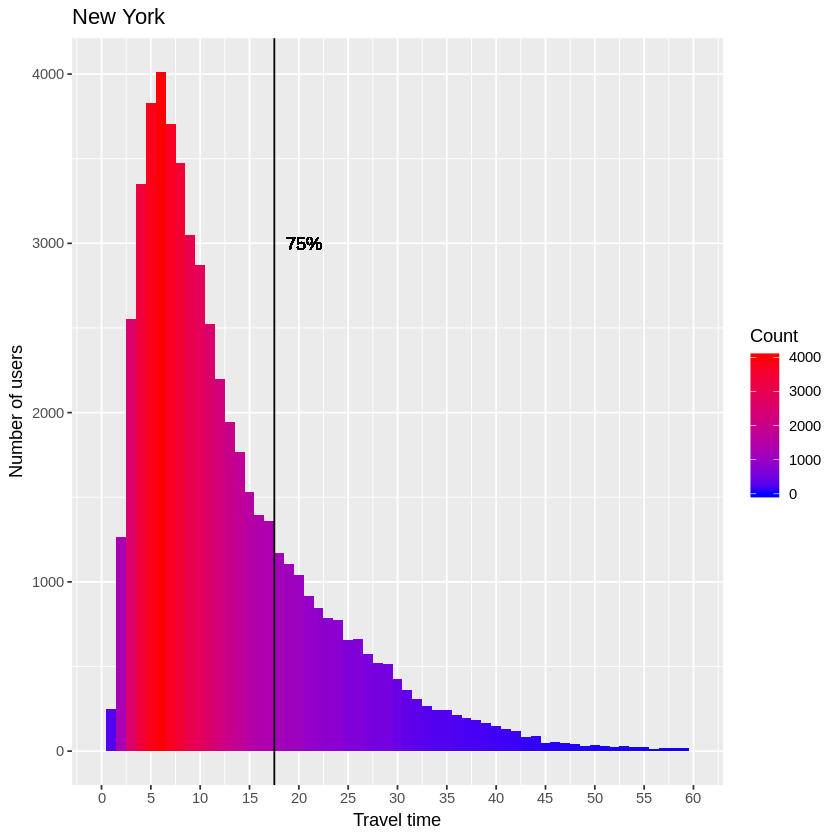

In [7]:
TimeTravel()

Warning message:
“Removed 4524 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

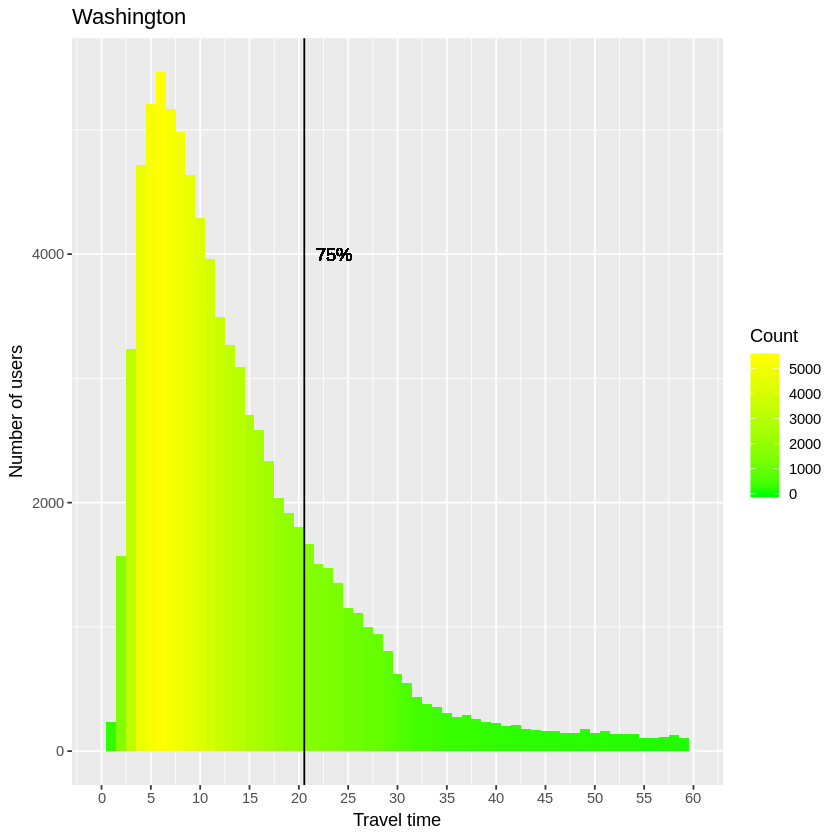

In [8]:
TimeTravel(wash, 'Washington', 'green', 'yellow', 4000)

Warning message:
“Removed 182 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

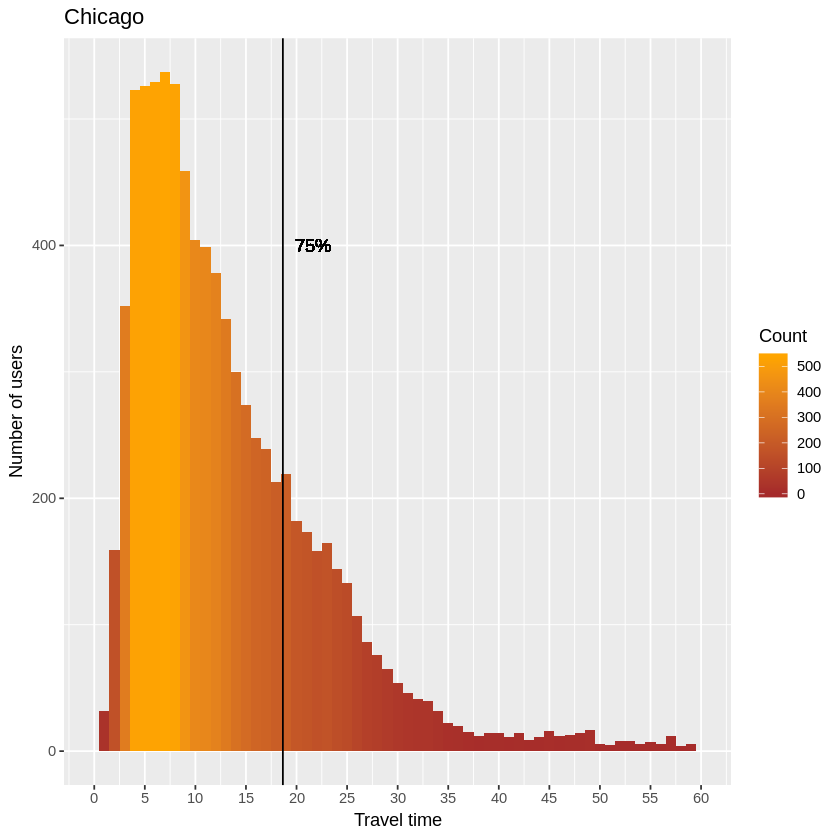

In [9]:
TimeTravel(chi, 'Chicago', 'brown', 'orange', 400)

We can see a very similar distribution in all three cities, though some litle differences. In New York most of trips are shorter in time than in Chicago or Washington. While in New York 75% of travels are less than 17.5 minutes, in Washington that number increase to 20 minutes. Interestingly, in New York there is very few travels of more than 45 minutes, we can see a big downfall after that time, while in Washington the curve get down in an smoother way. 

Also we can see how the most common time of travel is between just 5 and 10 minutes, so very short times. It is plausible to think that most of people think that if they require more than 10 minutes in bike to go to some place, maybe they should go for another options, like bus or metro. 

### Question 2

**What are the earliest, most recent, most common year of birth (only available for NYC and Chicago)?.**

Analyze the demographics when is possible is always an interesting thing to do in order to understand better the customers of a service. Let's first see some numbers about the year of birth of the users. We have this data for New York and Chicago. Let's check New York data first.

In [10]:
'Basic statistics:'
summary(ny$Birth.Year)
'Number of user per birth year:'
table(ny$Birth.Year)
'Number of cases in data:'
nrow(ny)

[1] "Basic statistics:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1885    1970    1981    1978    1988    2001    5218 

[1] "Number of user per birth year:"


1885 1886 1893 1899 1900 1901 1910 1917 1923 1926 1927 1930 1932 1934 1935 1936 
   3    1    1    2    7    2    3    1    1    1    1    1    3    7    1    2 
1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 
   1    5    8   18   28   38   19   35   42   70   87   81   90  127  180  211 
1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 
 338  325  341  372  457  521  578  714  629  779  703  846  859  797  828  899 
1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 
 951 1075 1050  934  963 1065  980 1101 1154 1215 1262 1398 1540 1568 1747 1790 
1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 
2039 1987 1976 1973 2050 2027 1709 1527 1206  724  473  373  251  192  115   71 
2001 
   3 

[1] "Number of cases in data:"

[1] 54770

In the table above we can see already some interesting things. First, we should have in mind that this data is from 2017. There is few users born in 1900 or earlier, so users older than 110 years. Interestingly, there are more in 1900 than in years close to this date. We know that some users don't like to give some information and they may chose some round date, like 1900; it may be the case.

These extreme outliers move our average a bit to the left, while median is higher. Also we see that the younger user is 16 years old, and that there is pretty many rows without the birth year information.



Let's check now the Chigado data.

In [30]:
'Basic statistics:'
summary(chi$Birth.Year)
'Number of user per birth year:'
table(chi$Birth.Year)
'Number of cases in data:'
nrow(chi)

[1] "Basic statistics:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1899    1975    1984    1981    1989    2002    1747 

[1] "Number of user per birth year:"


1899 1900 1901 1918 1930 1939 1940 1942 1944 1945 1946 1947 1948 1949 1950 1951 
   2    2    1    1    1    2    2    3    2    5   10    1    4   19    6   22 
1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 
  29   17   34   24   46   39   44   51   68   58   84   58   83   96   90   77 
1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 
  89  105  118   88   96  102  100  122  119  139  149  161  170  222  241  249 
1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 
 304  280  350  360  362  388  384  357  324  217  155   58   43   32   12    3 
2000 2002 
   2    1 


[1] "Number of cases in data:"

[1] 8630

Similarly, we find some outliers, although less. Also the sample is smaller than in case of New York, only 8K rows vs 54K. Seems users are in average a bit younger too.

We saw some interesting things, but is difficult to have a picture of data just reading the numbers. Let's make some graphs.

In [12]:
BirthYear = function(city = ny, city_name = 'New York', outline_color = 'green', fill_color = 'blue', label_height = 1900){
    ggplot(aes(x=Birth.Year), data=city) + labs(x="Birth year", y="Amount of users", title = city_name) +
    geom_histogram(color = outline_color, fill = fill_color, binwidth = 1) + 
    scale_x_continuous(lim=c(1930, 2010), breaks=seq(1900, 2010,10)) +
    geom_vline(aes(xintercept = as.numeric(summary(city$Birth.Year)[4]))) + 
    geom_text(aes(x = summary(city$Birth.Year)[4] -7 , y = label_height, label = "Mean value"))
}

Warning message:
“Removed 5241 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

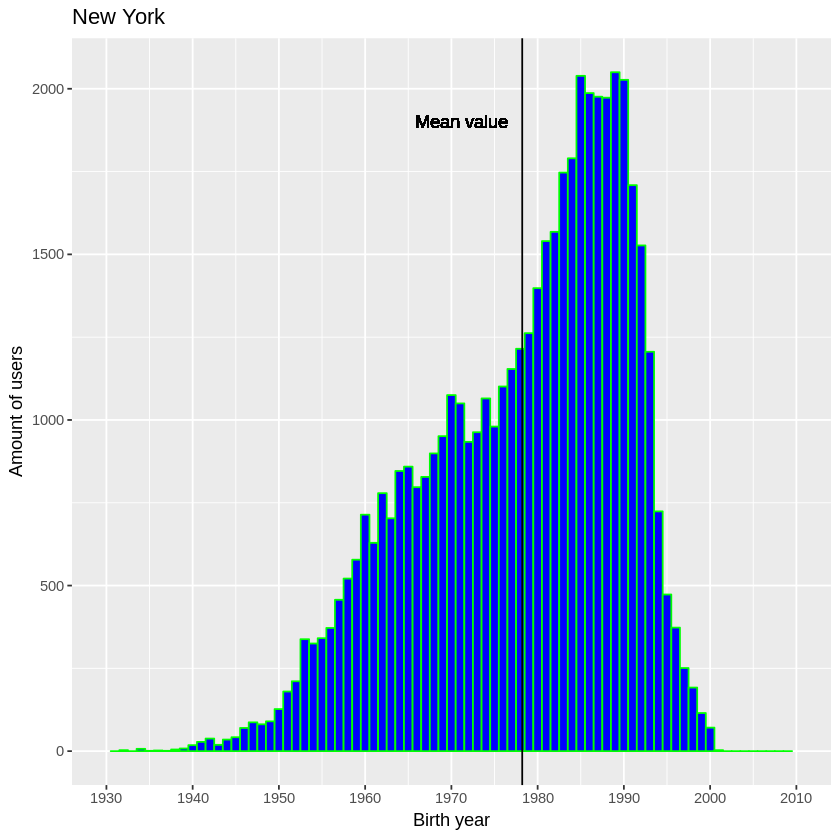

In [13]:
BirthYear()

Warning message:
“Removed 1753 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

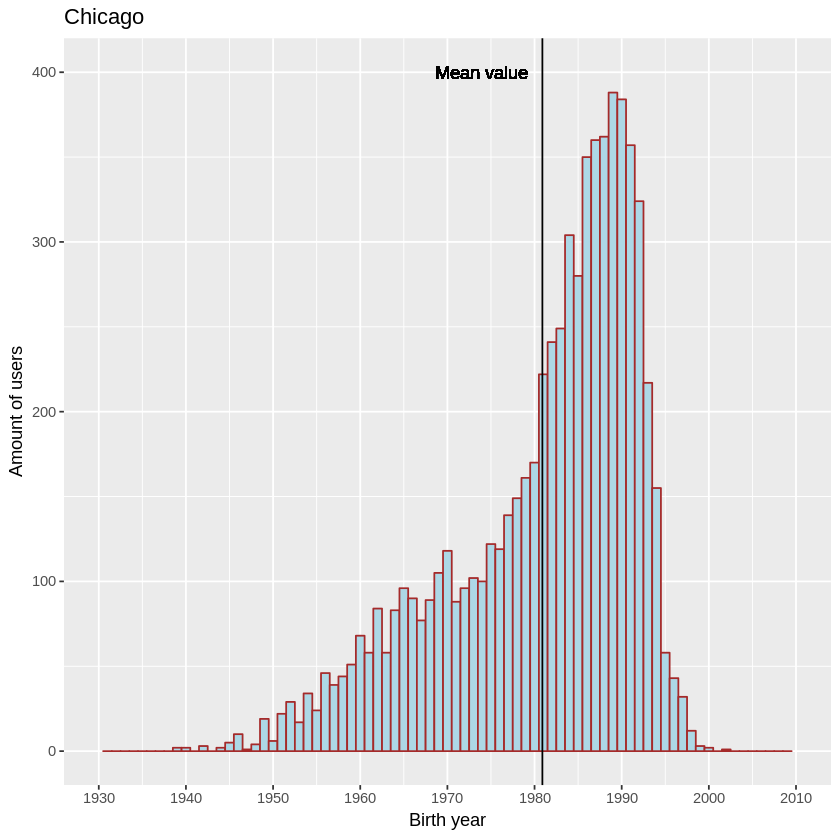

In [14]:
BirthYear(chi, 'Chicago', 'brown', '#add8e6', 400)

Now we can see better that the most common user of this service is a pretty young person of 28 - 35 years old. This is similar in both cities. But because there are a lot more ages that can be older than younger, the mean and average are more close to 38-40 years old. 

Good! This is very interesting, however, I wonder if we can find some correlation between the age of users and other information we have. Let's try to connect the age with the trip duration.

In [15]:
DurationBirthYear = function(city = ny, transparency = 1/15, dot_color = 'blue', city_name = 'New York'){
    ggplot(aes(x=(Birth.Year), y=Trip.Duration), data=city) + geom_jitter(alpha=transparency, color = dot_color) + 
    labs(x="Birth year", y="Trip duration", title = city_name) + 
    scale_x_continuous(lim=c(1930,2010), breaks=seq(1930, 2010, 10)) + ylim(1,5000) +
    geom_line(stat = 'summary', fun.y = mean)
}

Warning message:
“Removed 5348 rows containing non-finite values (stat_summary).”Warning message:
“Removed 5348 rows containing missing values (geom_point).”

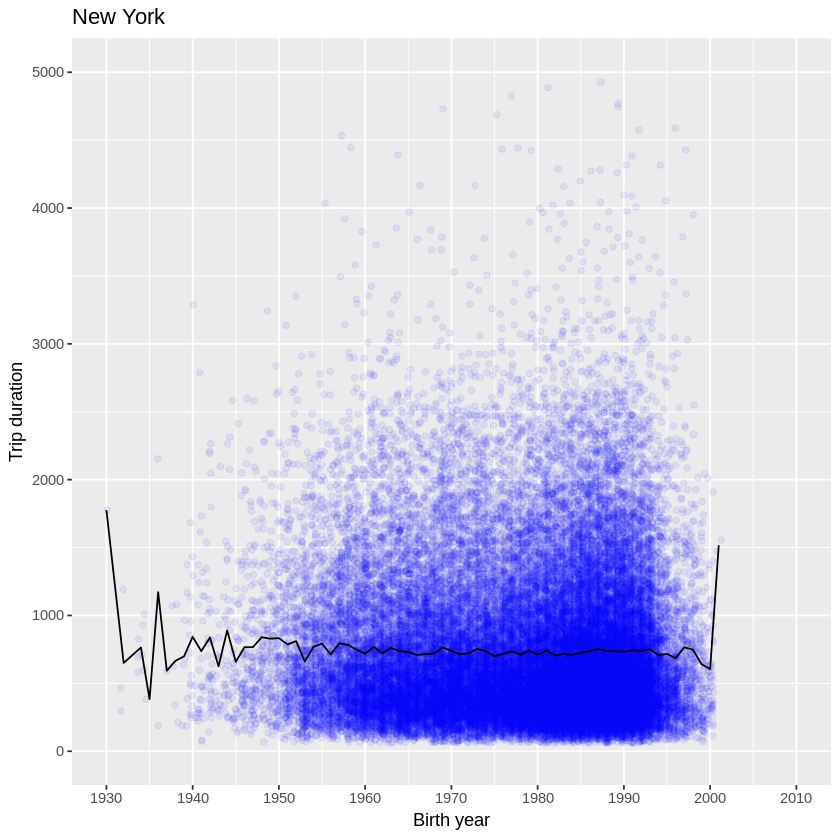

In [16]:
DurationBirthYear()

Warning message:
“Removed 1759 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1760 rows containing missing values (geom_point).”

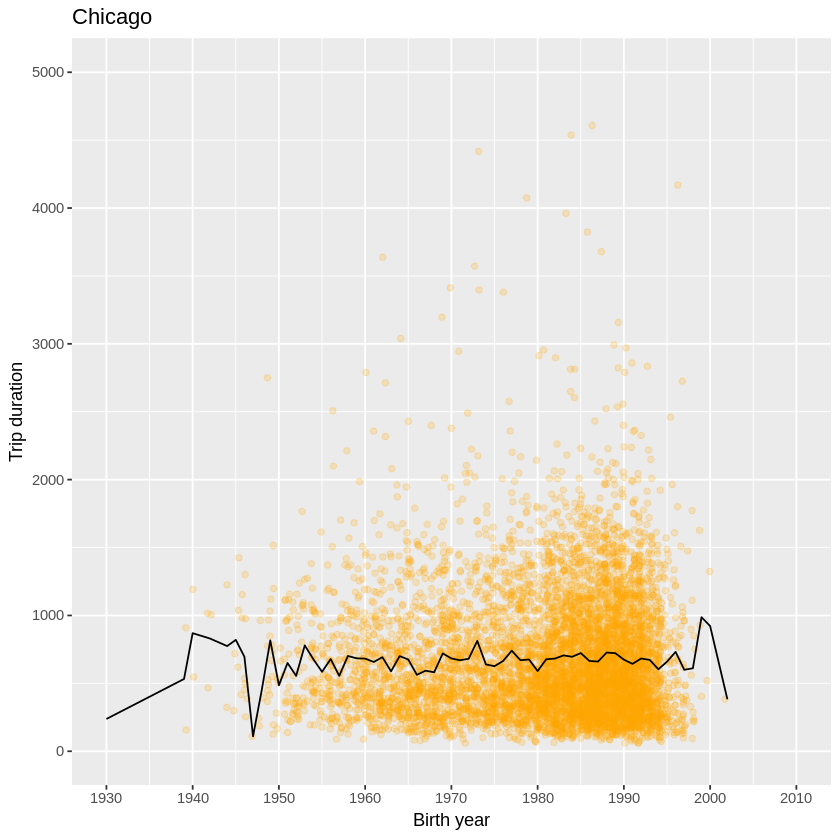

In [17]:
DurationBirthYear(chi, 1/5, 'orange', 'Chicago')

This is very interesting: if we only watch the dots of graphic, we can see a kind of spike in the younger area, suggesting that young people have travels of longer duration. But, we should remember that most of users are also of that cohort. So when we apply the mean over the graphic (black line), we see that actually 50-60 years old users have similarly long (in time) travels than younger 25-35 people. In case of Chicago, where we have less data, this is not so clear, but in New York we see a really flat line. 

### Question 3

**What are the counts of each gender (only available for NYC and Chicago)?.**

Another interesting topic is always the gender differences. We can sometimes find interesting behavioral patterns in women and men. Let's explore this question in the two cities where we have this information. We will start with New York.

In [18]:
GenderRatio = function(city = ny){
    print(summary(city$Gender))
    round(summary(city$Gender)[2] /(summary(city$Gender)[2] + summary(city$Gender)[3]), 2)
}

In [19]:
GenderRatio()

       Female   Male 
  5410  12159  37201 


Female 
  0.25

We find that only 25% of travels are made by women. We are ignoring around 5K rows without gender on it. 

Let's check now Chicago.


In [20]:
GenderRatio(chi)

       Female   Male 
  1748   1723   5159 


Female 
  0.25

Surprisingly we found the same ratio. 

Now that we know the proportion of women and men, let's see if there is some differences in their behavoir. Let's start by looking the percentage of the total trip duration did by each gender.

In [21]:
DurationPerGender = function(city = ny, city_name = 'New York'){
    print(city_name)
    by(city$Trip.Duration, city$Gender, sum)
    den = (by(city$Trip.Duration, city$Gender, sum)[2] + by(city$Trip.Duration, city$Gender, sum)[3])
    round((by(city$Trip.Duration, city$Gender, sum)[2]/ den), 2)
}

In [22]:
DurationPerGender()

[1] "New York"


Female 
  0.27

In [23]:
DurationPerGender(chi, 'Chicago')

[1] "Chicago"


Female 
  0.28

There is something here! Seems women have a bit longer trips than men. Otherwise we would expect they have 25% too of trip duration, but is a bit more in both cities. 

Not bad, but I think we can find something more interesting. Historically women were always more afraid to go out alone during the night, a cautious behavior unfortunately very justified due to the higher risk of being assaulted. I wonder if there is some gender difference in night travels. Let's try to find out.

In [24]:
library(lubridate) # We will use this library to manipulate the date column


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [25]:
ny$hour = hour(ymd_hms(ny$Start.Time)) # We create a new column 'hour' extracting the hour from Start. Time and append to 
chi$hour = hour(ymd_hms(chi$Start.Time)) # at the end of each dataset.

In [26]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,hour
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,14
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,15
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,13
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,19
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,7
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,18


In [31]:
ny2 = ny[!(is.na(ny$Gender) | ny$Gender==""), ] # We rip off rows where gender is missing
chi2 = chi[!(is.na(chi$Gender) | chi$Gender==""), ] 

Now that we prepared the data, let's create a function to plot a graphic comparing both genders.

In [36]:
DailyTimeByGender = function(city=ny2){
    ggplot(aes(x=hour, y = ..density..), data=city) + geom_histogram(color = 'blue', bins = 24) +
    scale_x_continuous(lim=c(0,24), breaks=seq(0, 24, 2))  + facet_wrap(~Gender) + xlab('Hours') + 
    ylab('Proportion of users')
}

Warning message:
“Removed 4 rows containing missing values (geom_bar).”

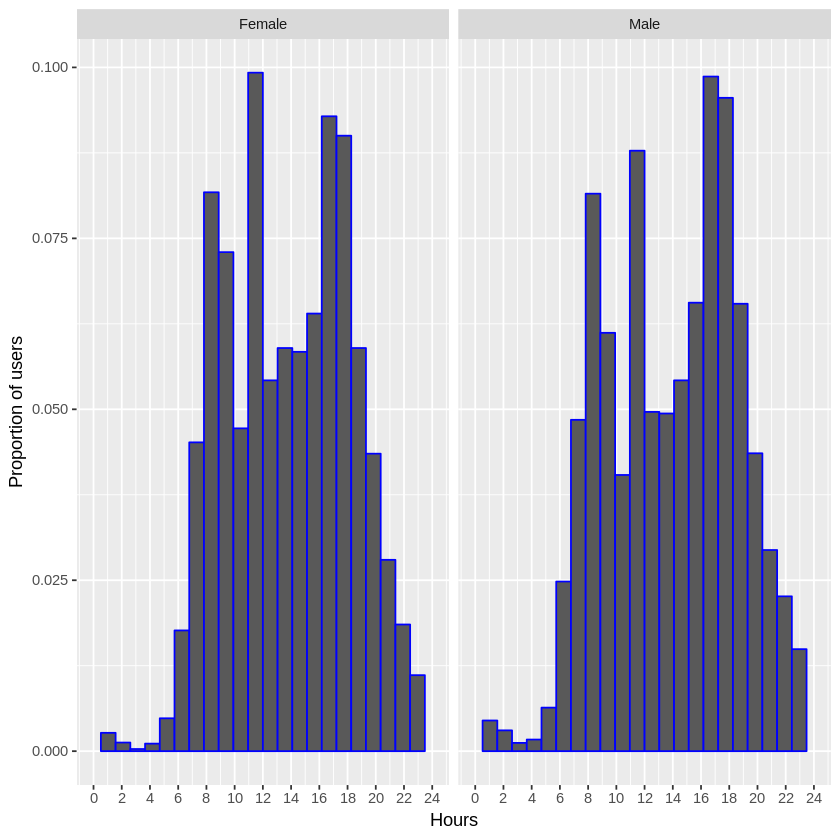

In [37]:
DailyTimeByGender()

Warning message:
“Removed 4 rows containing missing values (geom_bar).”

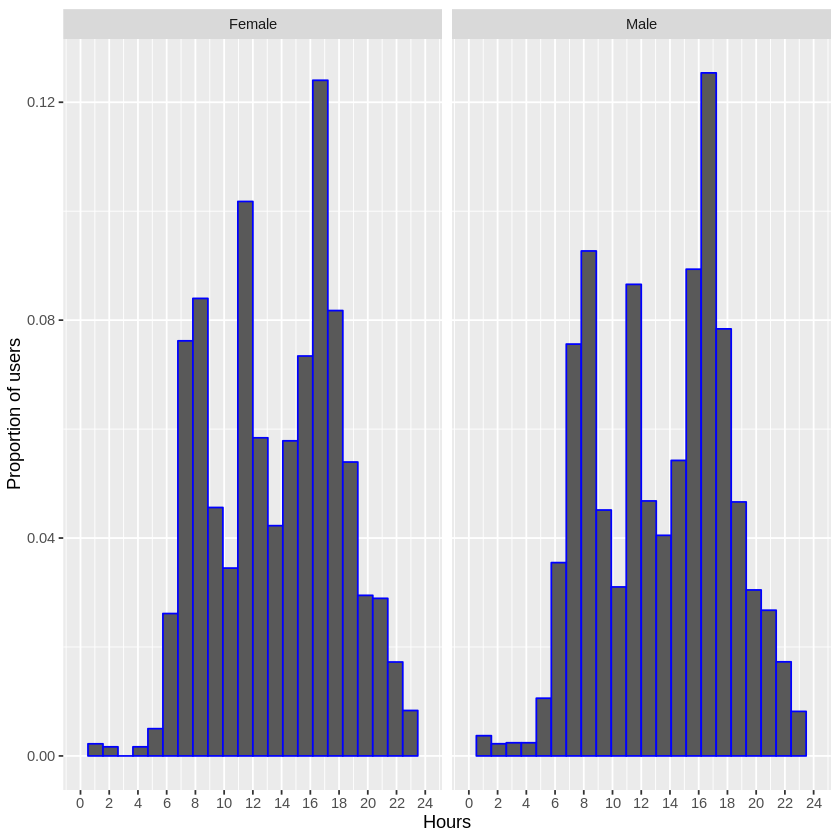

In [38]:
DailyTimeByGender(chi2)

To make the two groups more easy to compare, we apply the parameter 'density' that make graphics at the same scale, independently of how many users we have (remember only 25% of rows are about women). Now we can compare easily women and men. 

We can observe several interesting things: first, the graphics are quite similar, with some pikes at the same hours, at 8 of the morning, at 11-12 and at afternoon, around 17-18. Having in mind we took just the start time of the trip, seems these hours are related with job: entrance, lunch, and leaving. Interestingly there is a notable higher proportion of women "going to lunch" in both cities. Maybe men prefer more often to have a lunch in the office? 

Also, as we wanted to know, in New York after 21 hours men ride bikes more often than women, until 4-5 of the morning more or less. In chi Observe that at 3 of the morning there is more than twice men users that women, thought both groups are very little at that hour. 


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [29]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')